#### Group 4854 Capstone Project

Welcome to our final group work project (the Capstone) which is to do with the statistical properties of financial markets during the Covid period. 

In [1]:
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt

/tmp/ipykernel_1761/2374658535.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_data(tl):    
    inst_list = ['^GSPC', '^FTSE', 'CL=F','GC=F', 'BTC-USD', 'TLT']
    data = pd.DataFrame()
    for inst in inst_list:
        try:
            data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except Exception as e:
            print('No data available for ',inst, e)

    return data

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['^GSPC', '^FTSE', 'CL=F','GC=F', 'BTC-USD', 'TLT']
from datetime import datetime
startdate = datetime(2019,12,1)
enddate = datetime(2021,1,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[****************      33%%                      ]  2 of 6 completed/home/codespace/.p

In [4]:
# Read the timelines from the CSV file
timelines = pd.read_csv('pandemics_timelines.csv').dropna()
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])
timelines 

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,1968-07-01,1968-09-30,1968-09-30,1970-12-31
4,Asian Flu,1957-02-28,1957-06-30,1957-06-30,1958-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,1939-09-01,1939-09-01,1939-09-01,1945-09-02


In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['^GSPC', '^FTSE', 'CL=F','GC=F', 'BTC-USD', 'TLT']
from datetime import datetime
startdate = datetime(2019,12,1)
enddate = datetime(2021,1,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[****************      33%%                      ]  2 of 6 completed/home/codespace/.p

In [6]:
# Get data during covid19 pandemic
covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']
data= get_data(covid_timelines)
data.head()

No data available for  ^GSPC name 'timedelta' is not defined
No data available for  ^FTSE name 'timedelta' is not defined
No data available for  CL=F name 'timedelta' is not defined
No data available for  GC=F name 'timedelta' is not defined
No data available for  BTC-USD name 'timedelta' is not defined
No data available for  TLT name 'timedelta' is not defined


""


In [8]:
def plot_daily_pc(data, tl):
    data_pc = data.pct_change().dropna()
    fig = plt.figure(figsize=(18, 10))
    i = 0
    for col in data_pc.columns:
        # Add the subplot
        sub = fig.add_subplot(3, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot
        r = random.random()
        b = random.random()
        g = random.random()
        data_pc[col].plot(color=(r, g, b))
        sub.set_ylabel('Returns')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='Red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()
    
plot_daily_pc(data, covid_timelines)

<Figure size 1800x1000 with 0 Axes>

In [9]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()
    
plot_cumulative_returns(data, covid_timelines)

TypeError: no numeric data to plot

In [8]:
def calc_drawdown(data, tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    cum_rets = data_cum_ret.loc[tl.first_case.iloc[0]:tl.last_date.iloc[0]]
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown, tl):
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in drawdown.columns:
        # Add the subplot
        sub = fig.add_subplot(4, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot

        drawdown[col].plot(color='r')
        sub.set_ylabel('Returns')
        sub.fill_between(drawdown.index, drawdown[col], color='red')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_10460/3696514892.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_cum_ret = (data.pct_change()+1).cumprod()


^GSPC      -33.924960
^FTSE      -34.929510
CL=F      -159.475266
GC=F       -11.776647
BTC-USD    -51.861691
TLT        -15.727699
dtype: float64


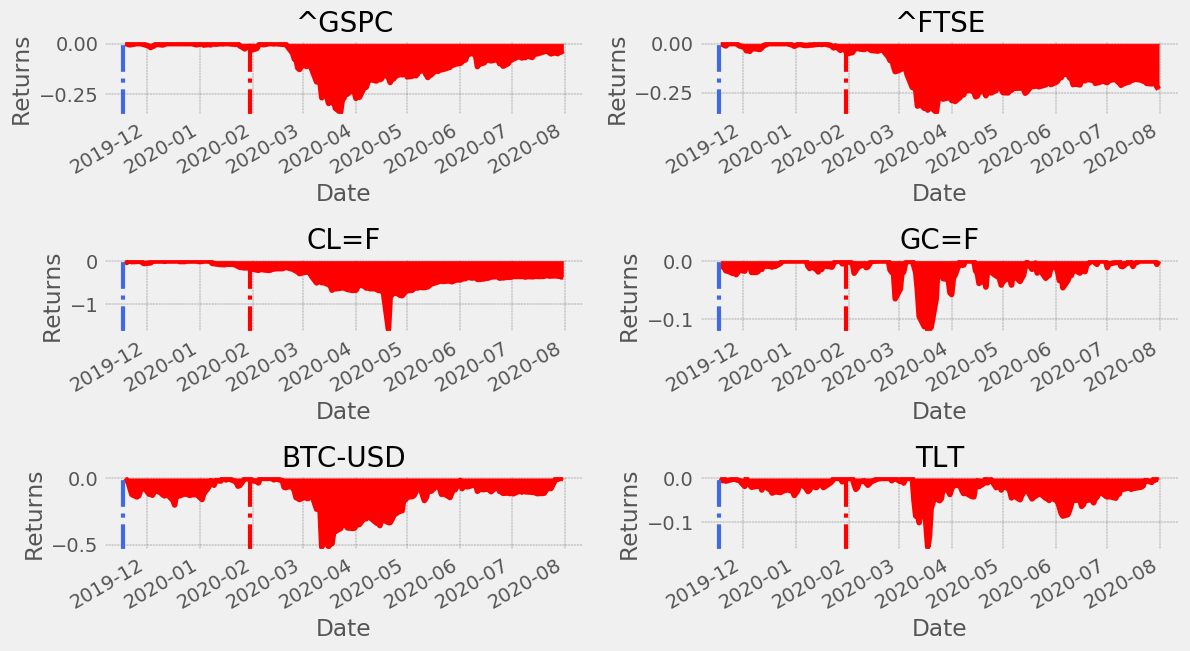

In [86]:
#data.columns = ['SP500', 'FTSE 100', 'Crude Oil', 'Gold', 'Bitcoin', 'TLT']
drawdown = calc_drawdown(data,covid_timelines)
# Find the maximum drawdowns
print(drawdown.min()*100)
#plt.style.use('seaborn-darkgrid')
plot_drawdown(drawdown,covid_timelines)

KeyError: '^GSPC'

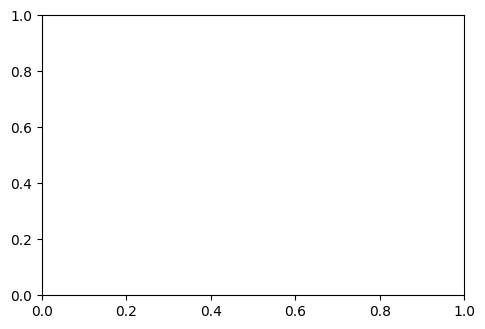

In [15]:
def plot_scatter(data, tl):
    data_pc = data.pct_change().dropna()
    temp = data_pc.loc[tl.who_emergency.iloc[0]:tl.last_date.iloc[0]]

    fig = plt.figure(figsize=(12, 8))

    sub = fig.add_subplot(2, 2, 1)
    sub.scatter(temp['^GSPC'],temp['TLT'],color='red')
    sub.set_title('SP500 Returns Vs TLT Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 2)
    sub.scatter(temp['^GSPC'],temp['GC=F'],color='blue')
    sub.set_title('SP500 Returns Vs Gold Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 3)
    sub.scatter(temp['^GSPC'],temp['CL=F'],color='green')
    sub.set_title('SP500 Returns Vs Crude Oil Returns')
    sub.grid()
    
    # Correlation
    sum_corr = data_pc[data_pc.columns].corr()
    print('Correlation',sum_corr)


    plt.tight_layout()
    plt.show()
    
plot_scatter(data,covid_timelines)  

In [21]:
def plot_auto_correlation(data, tl):
    data_pc = data.resample('W').ffill().pct_change()*100
    fig = plt.figure(figsize=(12, 8))
    i=1
    for col in data_pc.columns:        
        sub = fig.add_subplot(2, 2, i)
        i=i+1
        r = random.random()
        b = random.random()
        g = random.random()        
        sub.scatter(data_pc.loc[:,col],data_pc.shift(1).loc[:,col],color=(r,g,b))
        sub.set_title(col)
    plt.tight_layout()
    plt.show()
    
plot_auto_correlation(data,covid_timelines)   

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [22]:
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)  

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements